In [2]:
import numpy as np 
import matplotlib.pyplot as plt

### Question 1

In [28]:
# 1.)
def f(x): 
    return 2.0*(np.exp(-(x**2)))*(np.cos(2*np.pi*x))

In [34]:
def search_closest(xp, x):
    for i in range(len(x)):
        if xp>x[i]:
            return x[i], x[i+1]

def linear_interpolate(xp,x):
    a, b = search_closest(xp,x)
    f1 = f(a)
    f2 = f(b)
    m = (f2-f1)/(b-a)
    y = m*(xp - a) + f1
    return y 

#Error
def error(f, xp, y):
    error = abs(f(xp) - y)
    return error

#2.)
xp = -0.45 
q = [2,4,8,16]
for i in q:
    x = list(np.linspace(-1,1,i+1))
    print("For q =",i)
    print("Interpolated value:", linear_interpolate(xp,x))
    print("Error in interpolation:", error(f, xp, linear_interpolate(xp,x))) 

For q = 2
Interpolated value: 1.431091497054298
Error in interpolation: 2.9845214991445017
For q = 4
Interpolated value: -1.7869376109913797
Error in interpolation: 0.23350760890117606
For q = 8
Interpolated value: -0.8829106588114621
Error in interpolation: 0.6705193432787415
For q = 16
Interpolated value: 0.39216948852717426
Error in interpolation: 1.945599490617378


### Question 2

In [79]:
#a)
def L_k(x, k, j, xp, yp):
    return (x - xp[j])/(xp[k] - xp[j])
    
def p_L(x, xp, yp):
    y = 0
    n = len(xp)
    for i in range(n):
        p = 1
        for j in range(n):
            if i != j:
                p = p * L_k(x, i, j, xp, yp)
        y = y + p * yp[i]    
    return y 

In [101]:
#b)
def test_p_L(xp, yp):
    for i in range(len(xp)):
        print("error values:",abs(p_L(xp[i], xp, yp) - yp[i]))

xp = np.linspace(0, np.pi, 5)
yp = np.array([np.sin(x) for x in xp])

test_p_L(xp, yp)

xp_ = np.linspace(xp[0], xp[1], 4)
yp_ = np.array([np.sin(x) for x in xp_])

y1 = p_L(xp_[1], xp, yp)
y2 = p_L(xp_[2], xp, yp)
y3 = p_L((xp_[1]+xp[2])/2, xp, yp)
print("Interpolated point between 2 interpolated points:", y3)
print("Actual value:", np.sin((xp_[1]+xp[2])/2))

error values: 0.0
error values: 0.0
error values: 0.0
error values: 0.0
error values: 0.0
Interpolated point between 2 interpolated points: 0.793568074596188
Actual value: 0.7933533402912352


### Question 3 

for x = 0.785, interpolated value using Neville's method: 3.096


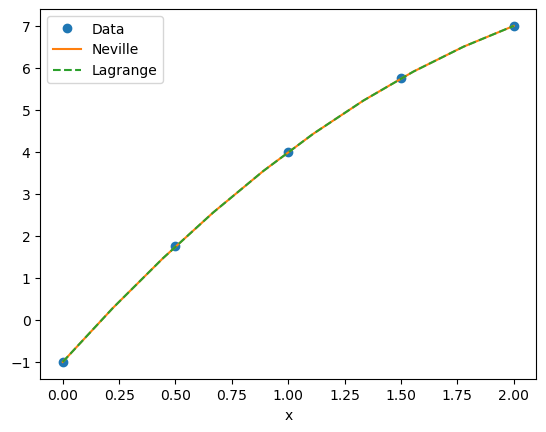

In [95]:
def neville(xData, yData, x):
    m = len(xData)   
    y = yData.copy()
    for k in range(1,m):
        y[0:m-k] = ((x - xData[k:m])*y[0:m-k] + (xData[0:m-k] - x)*y[1:m-k+1])/(xData[0:m-k] - xData[k:m]) 

    return y[0]

xData = np.array([0, 0.5, 1, 1.5, 2])
yData = np.array([-1.00, 1.75, 4.00, 5.75, 7.00])
#a) 
print("for x = %.3f, interpolated value using Neville's method: %.3f" % (np.pi/4, neville(xData, yData, np.pi/4)))

x = np.linspace(0.0, 2.0, 10)
n = len(x)
yn = np.zeros(n)
yl = np.zeros(n)

#b) 
for i in range(n):
    yn[i] = neville(xData,yData,x[i])
    yl[i] = p_L(x[i], xData, yData)

#c)
plt.plot(xData, yData,'o')
plt.plot(x, yn, '-')
plt.plot(x, yl, '--')
plt.xlabel('x')
plt.legend(('Data','Neville','Lagrange'),loc = 0)
plt.show()


        